In [21]:
# 선형 회귀

In [29]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [41]:
cond = df['Species'] == 'Perch'
perch_df = df.loc[cond]
perch_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [44]:
perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]
# perch_length

In [45]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight)

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [47]:
lr.score(test_input, test_target)

0.9146922992762284

In [48]:
lr.predict([[100]])

C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3043.16772031]])

In [49]:
lr.coef_

array([[36.68203342]])

In [50]:
lr.intercept_

array([-625.03562202])

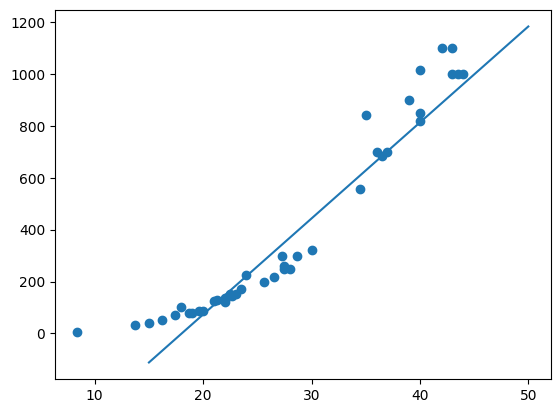

In [55]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * 37 - 667, 50 * 37 - 667]) # 선 그래프

In [57]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.917045526655482
0.9146922992762284


In [58]:
# 다항 회귀

In [59]:
train_input['Length2_poly'] = train_input['Length2'] ** 2

In [61]:
train_input.head()

,Length2,Length2_poly
80,19.6,384.16
107,28.7,823.69
89,22.0,484.00
112,36.5,1332.25
100,25.6,655.36


In [62]:
# 채점 데이터에도 제곱해줘야 함
test_input['Length2_poly'] = test_input['Length2'] ** 2
test_input

,Length2,Length2_poly
91,22.5,506.25
118,39.0,1521.00
115,37.0,1369.00
104,27.5,756.25
99,25.0,625.00
109,32.8,1075.84
82,21.0,441.00
117,39.0,1521.00
120,40.0,1600.00
98,24.6,605.16


In [63]:
lr = LinearRegression()

In [65]:
lr.fit(train_input, train_target)
# 길이와 길이의 제곱 두 개의 데이터 들어있는 상태임

LinearRegression()

In [66]:
lr.score(test_input, test_target)

0.9687398718986933

In [69]:
lr.predict([[2, 4]])

C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[76.25882967]])

In [70]:
print(lr.coef_, lr.intercept_)

[[-20.81227793   0.99675668]] [113.89635883]


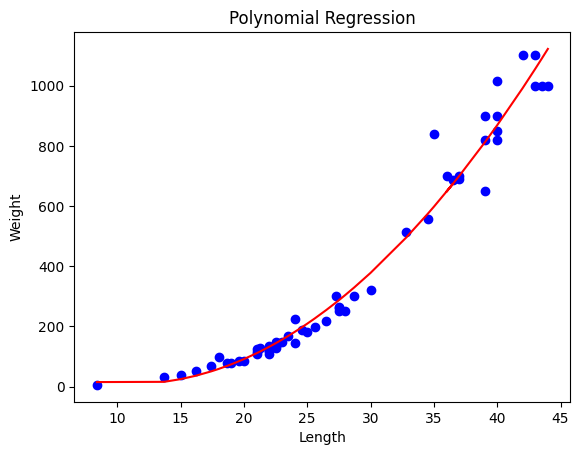

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터
X = perch_df[['Length2']]  # Length 컬럼만 선택
y = perch_df['Weight']    # Weight 컬럼

# 다항 회귀 모델 생성 (2차 다항식)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # 길이 제곱을 포함한 변환

# 선형 회귀 모델로 훈련
model = LinearRegression()
model.fit(X_poly, y)

# 예측
y_pred = model.predict(X_poly)

# 시각화
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()


In [73]:
print(lr.predict([[1, 1]]))
print(lr.predict([[3, 9]]))

[[94.08083757]]
[[60.43033512]]


C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\1-09\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
